In [12]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

In [13]:
def VisBinClassDecisionBoundaries(model, xlims=[-30,30], ylims=[-30,30], h=0.05, features=None, 
                                  labels=None, alpha=0.25, title=None):
    # function visualizes decision boundaries using color plots
    # model is the classification model that can be any model in the scikit-learn package
    
    # creating meshgrid for different values of features
    xx, yy = np.meshgrid(np.arange(xlims[0], xlims[1], h), np.arange(ylims[0], ylims[1], h))
    # extracting predictions at different points in the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # plotting the mesh
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=alpha)
    plt.grid()
    
    # if the samples are given plot them on the same plot
    if (features is not None) and (labels is not None): 
        pos_rows = labels > 0
        neg_rows = labels <= 0
        plt.plot(features[pos_rows,0],features[pos_rows,1],'k+',markersize=10,mew=2)
        plt.plot(features[neg_rows,0],features[neg_rows,1],'r_',markersize=10,mew=2)
        plt.grid('on')
        
    plt.xlabel('feature1',fontsize=16), plt.ylabel('feature2',fontsize=16)
    if title is not None: 
        plt.title(title, fontsize=16)
    plt.show() 

<h3> Extra Exercise (SVM with polynomial kernel): </h3>

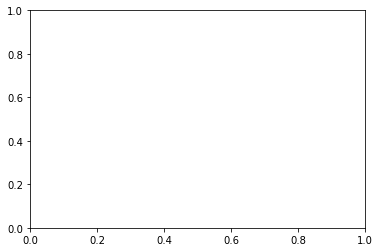

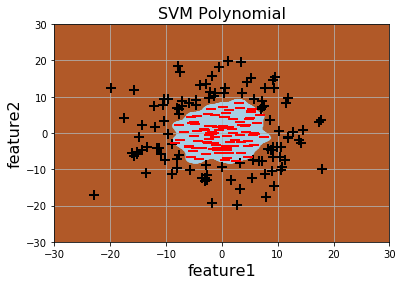

In [14]:
from sklearn import svm
features = np.loadtxt('data/ex4_features_classification.txt')
labels = np.loadtxt('data/ex4_labels_classification.txt')
svmp = svm.SVC(kernel='rbf')
svmp.fit(features, labels)
VisBinClassDecisionBoundaries(svmp, features=features, labels=labels, title='SVM Polynomial')

<h3> Extra Exercise (Random forests regressor): </h3>

Test sample's features:
 [[ 14.98836957]
 [  3.68762608]
 [ 17.95181208]
 [ 13.93820578]
 [ 17.63587021]
 [ 23.64575835]
 [ 15.17711225]
 [  8.53037434]
 [ 12.8126393 ]
 [ 23.36500876]
 [ 10.71167994]
 [  4.71890339]
 [ 20.33169523]
 [  4.54927709]
 [ 12.36124126]]
Predicted labels:
 [ 2.37957652  8.29413361  6.44285261  3.35678947  6.66091415  9.42508882
  5.42063046  5.70558745  3.61588015  9.40282038  4.51183112  7.51724853
  7.70869357  7.93011995  3.45340391]
Root mean squared error (RMSE): 0.3827163439256203


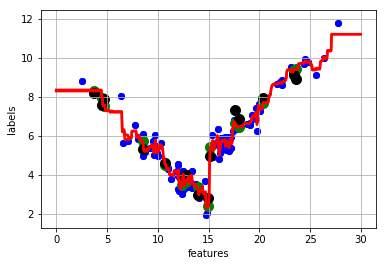

In [18]:
# Reading and visualizing the data
features = np.loadtxt('data/ex2_features_regression.txt')[:,np.newaxis]
labels = np.loadtxt('data/ex2_labels_regression.txt')

# Plotting
plt.scatter(features, labels, color='b')
plt.grid('on')
plt.xlabel('features')
plt.ylabel('labels')

# We create an object that can do linear regression
from sklearn.ensemble import RandomForestRegressor
rfor = RandomForestRegressor(n_estimators=100)
# We use the data to estimate its parameters with the fit function
rfor.fit(features, labels)

# Plotting
x = np.arange(0, 30., 0.05)[:,np.newaxis]
plt.plot(x, rfor.predict(x), 'r', linewidth=2.5)

# Reading features of the test samples and predicting with the learned model: 
test_features = np.loadtxt('data/ex2_test_features_regression.txt')[:,np.newaxis]
print("Test sample's features:\n {}".format(test_features))
test_predict = rfor.predict(test_features)
print("Predicted labels:\n {}".format(test_predict))

# Reading true labels and computing RMSE
test_labels = np.loadtxt('data/ex2_test_labels_regression.txt')
root_mean_squared_error = np.sqrt(np.mean((test_labels - test_predict)**2))
print("Root mean squared error (RMSE): {}".format(root_mean_squared_error))

# Plotting
plt.scatter(test_features, test_predict, color='g', s=100)
plt.scatter(test_features, test_labels, color='k', s=100)
plt.show() # showing everything on the screen